In [95]:
import numpy as np
import matplotlib.pyplot as plt
import time
import kmedoids

from scipy.io import arff
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.metrics import mutual_info_score

Kmean function

In [96]:
def kmean(k,datanp):
    tps1 = time.time()

    model = cluster.KMeans(n_clusters = k, init = 'k-means++')

    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    return labels,tps1,tps2,iteration,k,datanp

Display the result of a kmean or kmedoids function

In [97]:
def displayK(kList):
    labels,tps1,tps2,iteration,k,data = kList
    f0 = [f[0] for f in data]
    f1 = [f[1] for f in data]
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering KMeans")
    plt.show()
    print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

Sil score to optimise number of cluster (kmean)

In [98]:
def displayKmeanSilScore(datanp,min_cluster,max_cluster):
    sil_score_list = []
    tps1 = time.time()
    for i in range(min_cluster,max_cluster):
        km = KMeans(n_clusters=i)
        km.fit(datanp)
        sil = silhouette_score(np.array(datanp),km.predict(datanp))
        sil_score_list.append(sil)
    tps2 = time.time()
    plt.bar([i for i in range(min_cluster,len(sil_score_list)+min_cluster)],sil_score_list)
    plt.title('Sil Plot')
    plt.xlabel('# of Clusters')
    plt.ylabel('Sil Score')
    plt.show()
    nbMax = np.max(sil_score_list)
    indexMax = sil_score_list.index(nbMax) + min_cluster
    print("nb clusters = ",indexMax, ", runtime = ",round((tps2-tps1)*1000,2)," ms")
    return indexMax

Kmedoids function

In [99]:
def kmedoid(k,data):
    tps1 = time.time()
    distmatrix = euclidean_distances(data)
    fp = kmedoids.fasterpam(distmatrix,k)
    tps2 = time.time()
    iter_kmed=fp.n_iter
    labels_kmed = fp.labels
    return labels_kmed,tps1,tps2,iter_kmed,k,data

Sil score to optimise number of cluster (kmedoids)

In [100]:
def displayKmedoidsSilScore(datanp,min_cluster,max_cluster):
    sil_score_list = []
    tps1 = time.time()
    for i in range(min_cluster,max_cluster):
        sil = silhouette_score(np.array(datanp),kmedoid(i,datanp)[0])
        sil_score_list.append(sil)
    tps2 = time.time()
    plt.bar([i for i in range(min_cluster,len(sil_score_list)+min_cluster)],sil_score_list)
    plt.title('Sil Plot')
    plt.xlabel('# of Clusters')
    plt.ylabel('Sil Score')
    plt.show()
    nbMax = np.max(sil_score_list)
    indexMax = sil_score_list.index(nbMax) + min_cluster
    print("nb clusters = ",indexMax, ", runtime = ",round((tps2-tps1)*1000,2)," ms")
    return indexMax

import data

In [101]:
def importData(name):
    databrut = np.loadtxt("./dataset-rapport/"+name+".txt")
    data = [[x[0], x[1]] for x in databrut]

    f0 = [f[0] for f in data]
    f1 = [f[1] for f in data]
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales")
    plt.show()
    return data


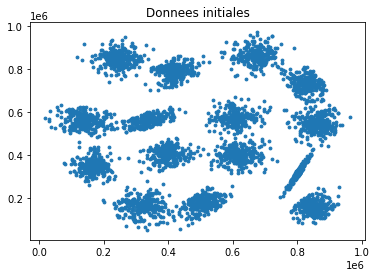

In [102]:
dataX1 = importData("x1")

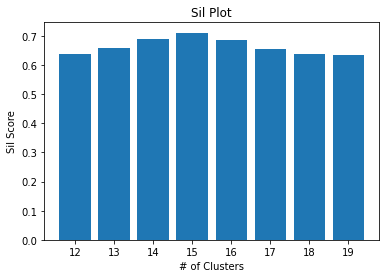

nb clusters =  15 , runtime =  6687.65  ms


In [103]:
nbClusterKMean = displayKmeanSilScore(dataX1,12,20)

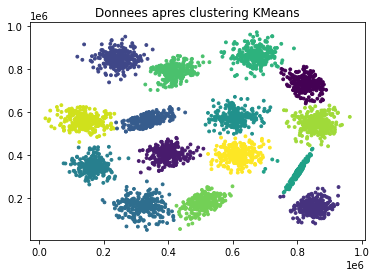

nb clusters =  15 , nb iter =  3 , runtime =  386.57  ms


In [104]:
displayK(kmean(nbClusterKMean,dataX1))

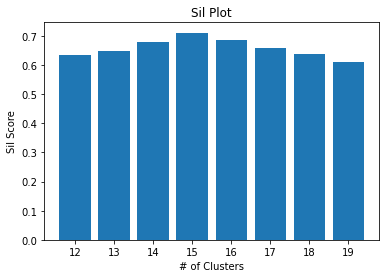

nb clusters =  15 , runtime =  5662.12  ms


In [105]:
nbClusterKMedoids = displayKmedoidsSilScore(dataX1,12,20)

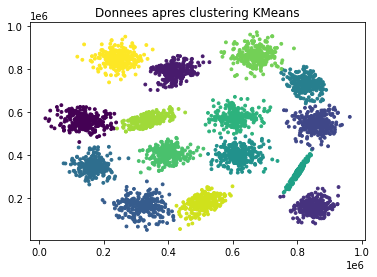

nb clusters =  15 , nb iter =  2 , runtime =  340.84  ms


In [106]:
displayK(kmedoid(nbClusterKMedoids,dataX1))

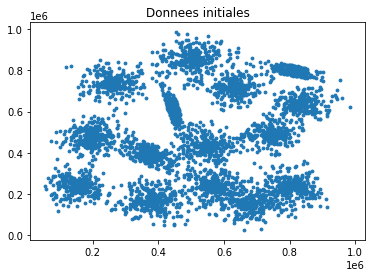

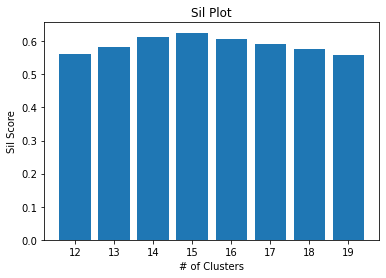

nb clusters =  15 , runtime =  6558.0  ms


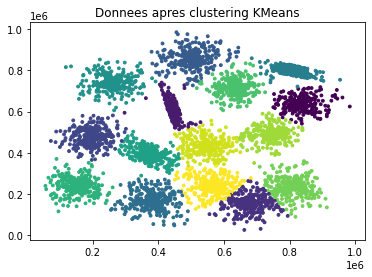

nb clusters =  15 , nb iter =  4 , runtime =  385.44  ms


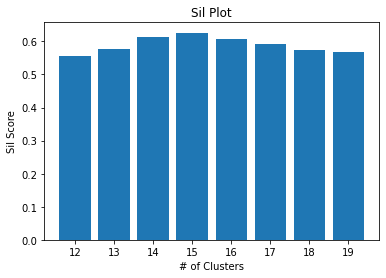

nb clusters =  15 , runtime =  6439.43  ms


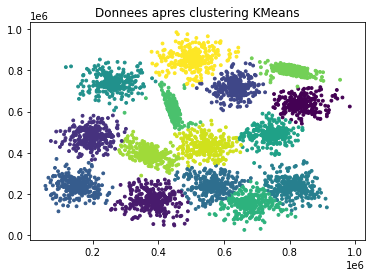

nb clusters =  15 , nb iter =  4 , runtime =  446.67  ms


In [107]:
dataX2 = importData("x2")
nbClusterKMean = displayKmeanSilScore(dataX2,12,20)
displayK(kmean(nbClusterKMean,dataX2))
nbClusterKMedoids = displayKmedoidsSilScore(dataX2,12,20)
displayK(kmedoid(nbClusterKMedoids,dataX2))

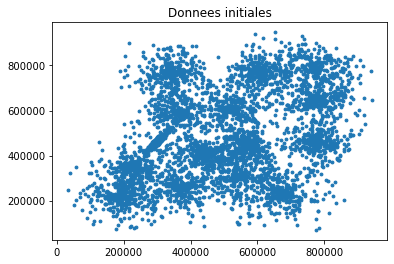

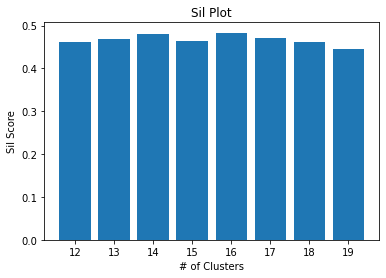

nb clusters =  16 , runtime =  6689.08  ms


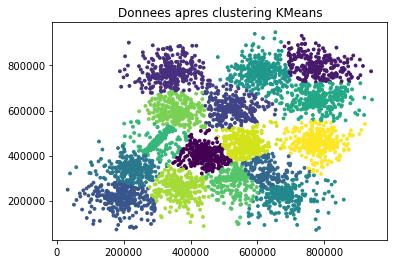

nb clusters =  16 , nb iter =  18 , runtime =  429.78  ms


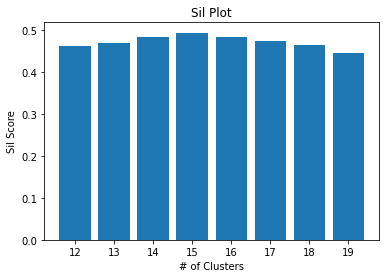

nb clusters =  15 , runtime =  6430.96  ms


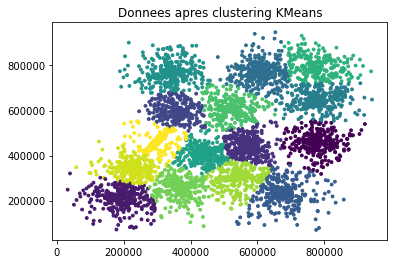

nb clusters =  15 , nb iter =  3 , runtime =  334.34  ms


In [108]:
dataX3 = importData("x3")
nbClusterKMean = displayKmeanSilScore(dataX3,12,20)
displayK(kmean(nbClusterKMean,dataX3))
nbClusterKMedoids = displayKmedoidsSilScore(dataX3,12,20)
displayK(kmedoid(nbClusterKMedoids,dataX3))

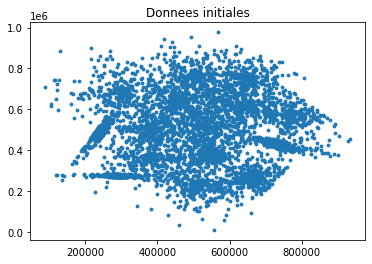

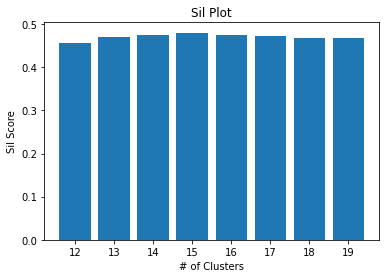

nb clusters =  15 , runtime =  6850.87  ms


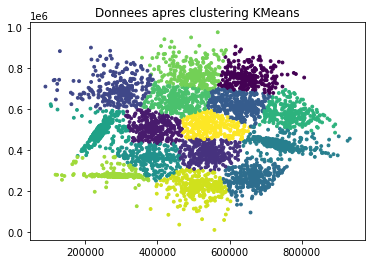

nb clusters =  15 , nb iter =  13 , runtime =  423.33  ms


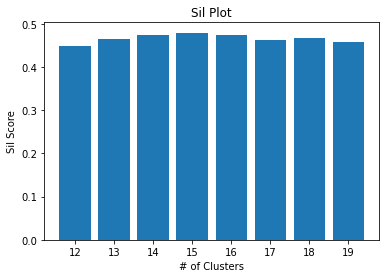

nb clusters =  15 , runtime =  6061.07  ms


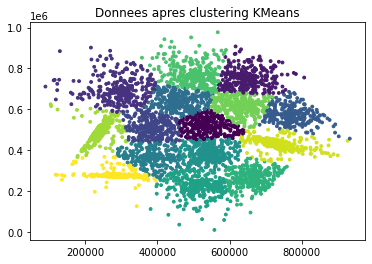

nb clusters =  15 , nb iter =  4 , runtime =  472.88  ms


In [114]:
dataX4 = importData("x4")
nbClusterKMean = displayKmeanSilScore(dataX4,12,20)
displayK(kmean(nbClusterKMean,dataX4))
nbClusterKMedoids = displayKmedoidsSilScore(dataX4,12,20)
displayK(kmedoid(nbClusterKMedoids,dataX4))

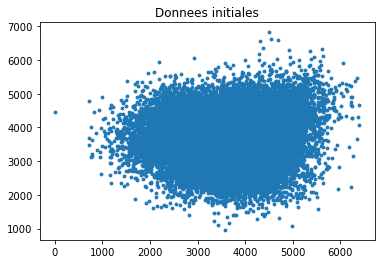

KeyboardInterrupt: 

In [113]:
dataY1 = importData("y1")
nbClusterKMean = displayKmeanSilScore(dataY1,2,5)
displayK(kmean(nbClusterKMean,dataY1))
nbClusterKMedoids = displayKmedoidsSilScore(dataY1,2,5)
displayK(kmedoid(nbClusterKMedoids,dataY1))

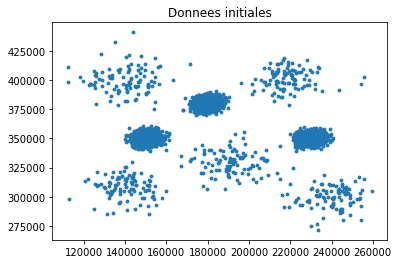

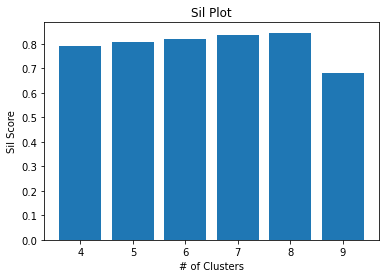

nb clusters =  8 , runtime =  6437.02  ms


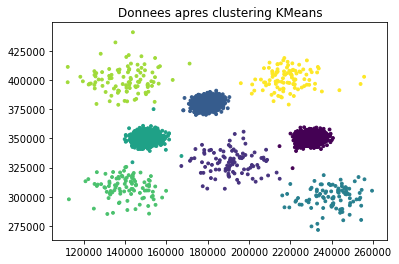

nb clusters =  8 , nb iter =  7 , runtime =  389.8  ms


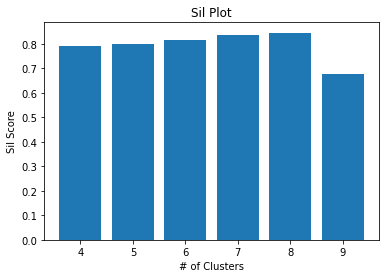

nb clusters =  8 , runtime =  7669.9  ms


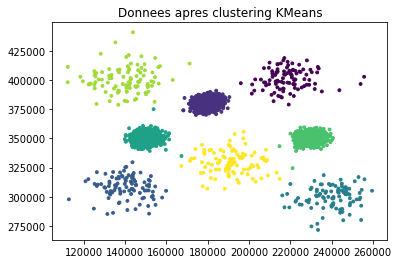

nb clusters =  8 , nb iter =  2 , runtime =  643.89  ms


In [117]:
dataZZ1 = importData("zz1")
nbClusterKMean = displayKmeanSilScore(dataZZ1,4,10)
displayK(kmean(nbClusterKMean,dataZZ1))
nbClusterKMedoids = displayKmedoidsSilScore(dataZZ1,4,10)
displayK(kmedoid(nbClusterKMedoids,dataZZ1))

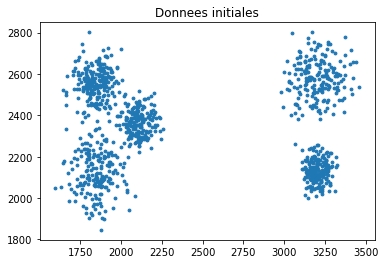

C:\Users\Utilisateur\anaconda3\envs\ApprNonSupperv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Utilisateur\anaconda3\envs\ApprNonSupperv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Utilisateur\anaconda3\envs\ApprNonSupperv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Utilisateur\anaconda3\envs\ApprNonSupperv\lib\sit

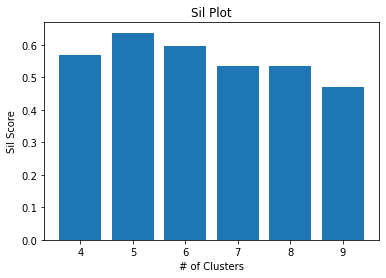

nb clusters =  5 , runtime =  3230.97  ms


C:\Users\Utilisateur\anaconda3\envs\ApprNonSupperv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


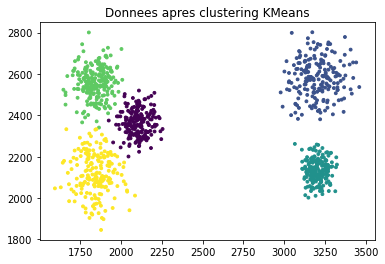

nb clusters =  5 , nb iter =  4 , runtime =  427.39  ms


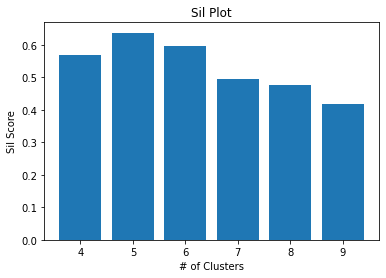

nb clusters =  5 , runtime =  311.4  ms


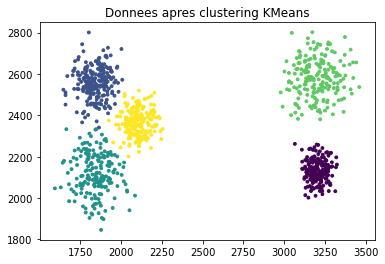

nb clusters =  5 , nb iter =  2 , runtime =  34.55  ms


In [118]:
dataZZ2 = importData("zz2")
nbClusterKMean = displayKmeanSilScore(dataZZ2,4,10)
displayK(kmean(nbClusterKMean,dataZZ2))
nbClusterKMedoids = displayKmedoidsSilScore(dataZZ2,4,10)
displayK(kmedoid(nbClusterKMedoids,dataZZ2))